<a href="https://colab.research.google.com/github/yohancsx/SmartMask/blob/main/data%20processing/DataCollectionVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
from google.colab import files
import io
import random

#change default plot size
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

**Partitioned Data**

In [2]:
#import the data from the CSV file(s)
uploaded = files.upload()

Saving Karl_Participant_1.CSV to Karl_Participant_1.CSV


In [3]:
#the name for the breathing data
dataFile = 'Karl_Participant_1.CSV'

#imports the data
dfData = pd.read_csv(io.BytesIO(uploaded[dataFile]))
dfData.columns = ['pressure','proximity','RMS','breathing type']

display("done loading data")
display(dfData)

#split the data into the columns and make numpy arrays
pressure = dfData['pressure'].to_numpy()
proximity = dfData['proximity'].to_numpy()
RMS = dfData['RMS'].to_numpy()
breathing_type = dfData['breathing type'].to_numpy()

#show the number of datasets
result = np.where(RMS == -1)
display("Number of Runs is:")
display(result[0].size + 1)

'done loading data'

,pressure,proximity,RMS,breathing type
0,99.73,0.0,0,0
1,99.73,0.0,0,0
2,99.73,0.0,0,0
3,99.74,0.0,0,0
4,99.73,0.0,0,0
...,...,...,...,...
60394,99.72,0.0,0,0
60395,99.73,0.0,0,0
60396,99.73,0.0,0,0
60397,99.73,0.0,0,0


'Number of Runs is:'

1

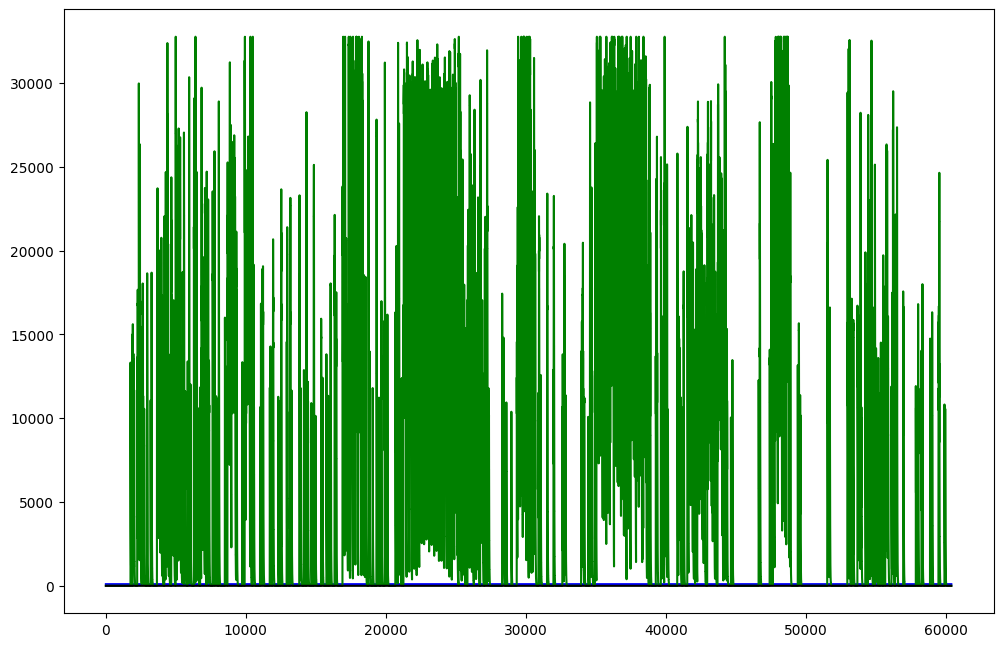

In [6]:
#get the time series in ms
t = np.arange(0, RMS.shape[0], 1)
  
# plot the x and y using plot function
l = plt.plot(t, pressure,'b',t, RMS,'g',t, breathing_type*10000,'k')
  
  
# Display the plot
plt.show()

In [7]:
#do some basic splitting of the data and plot
coughing  = -1*np.ones([6000,1])
breathing  = -1*np.ones([6000,1])
talking = -1*np.ones([6000,1])
heavy_breathing = -1*np.ones([6000,1])
deep_breathing = -1*np.ones([6000,1])

i = 0
ci = 0
bi = 0
ti = 0
hbi = 0
dbi = 0
while i < RMS.size:
    if breathing_type[i] == 0:
      breathing[bi] = RMS[i]
      bi = bi + 1
    elif breathing_type[i] == 1:
      coughing[ci] = RMS[i]
      ci = ci + 1
    elif breathing_type[i] == 2:
      talking[ti] = RMS[i]
      ti = ti + 1
    elif breathing_type[i] == 3:
      heavy_breathing[hbi] = RMS[i]
      hbi = hbi + 1
    elif breathing_type[i] == 4:
        deep_breathing[dbi] = RMS[i]
        dbi = dbi + 1
    i = i + 1


#remove all the negative numbers from the arrays to reduce their size
coughing  = coughing[coughing > 0]
breathing  = breathing[breathing > 0]
talking = talking[talking > 0]
heavy_breathing = heavy_breathing[heavy_breathing > 0]
deep_breathing = deep_breathing[deep_breathing > 0]


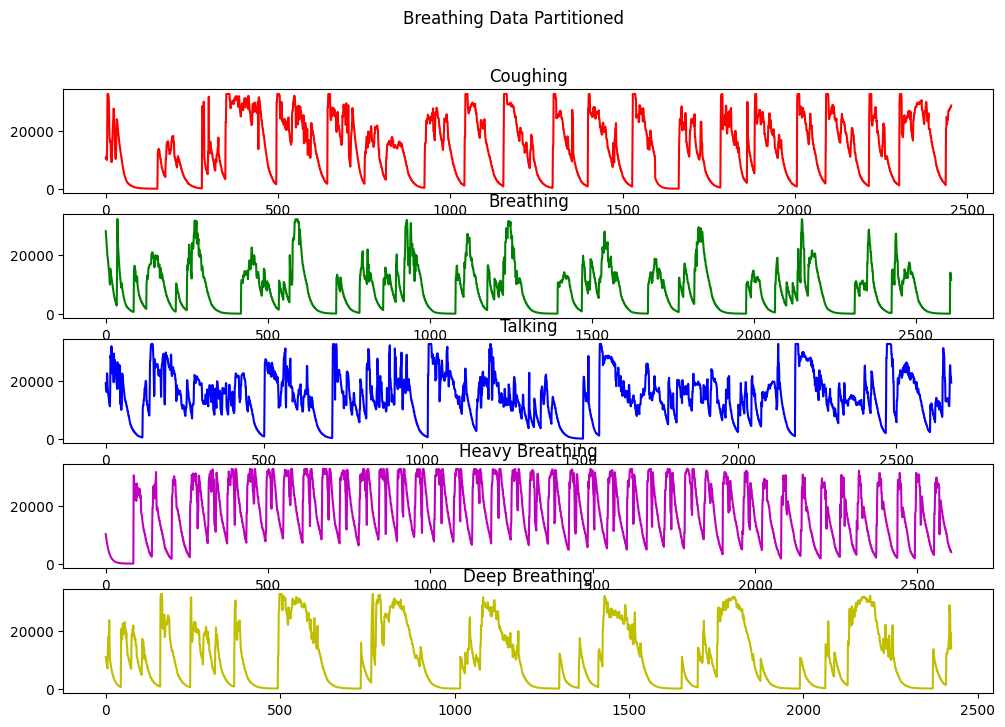

In [8]:
#display the data
fig, axs = plt.subplots(5)
fig.suptitle('Breathing Data Partitioned')
axs[0].plot(np.arange(0, coughing.shape[0], 1), coughing, 'r')
axs[0].set_title('Coughing')
axs[1].plot(np.arange(0, breathing.shape[0], 1), breathing, 'g')
axs[1].set_title('Breathing')
axs[2].plot(np.arange(0, talking.shape[0], 1), talking, 'b')
axs[2].set_title('Talking')
axs[3].plot(np.arange(0, heavy_breathing.shape[0], 1), heavy_breathing, 'm')
axs[3].set_title('Heavy Breathing')
axs[4].plot(np.arange(0, deep_breathing.shape[0], 1), deep_breathing, 'y')
axs[4].set_title('Deep Breathing')

plt.show()


**Continuous Data**

In [3]:
#import the data from the CSV file(s)
uploaded = files.upload()

Saving Karl_Participant_1.CSV to Karl_Participant_1 (1).CSV


In [4]:
#the name for the breathing data
dataFile = 'Karl_Participant_1.CSV'

#imports the data
dfData = pd.read_csv(io.BytesIO(uploaded[dataFile]))
dfData.columns = ['pressure','proximity','RMS','breathing type']

display("done loading data")
display(dfData)

#split the data into the columns and make numpy arrays
pressure = dfData['pressure'].to_numpy()
proximity = dfData['proximity'].to_numpy()
RMS = dfData['RMS'].to_numpy()
breathing_type = dfData['breathing type'].to_numpy()

#show the number of datasets
result = np.where(RMS == -1)
display("Number of Runs is:")
display(result[0].size + 1)

'done loading data'

,pressure,proximity,RMS,breathing type
0,99.73,0.0,0,0
1,99.73,0.0,0,0
2,99.73,0.0,0,0
3,99.74,0.0,0,0
4,99.73,0.0,0,0
...,...,...,...,...
60394,99.72,0.0,0,0
60395,99.73,0.0,0,0
60396,99.73,0.0,0,0
60397,99.73,0.0,0,0


'Number of Runs is:'

1

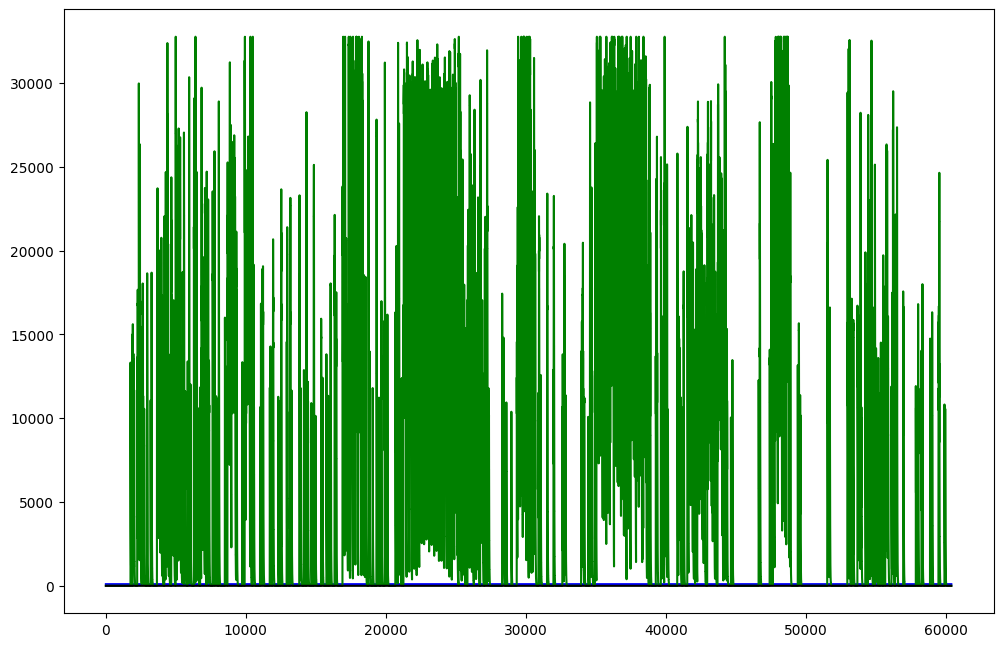

In [5]:
#get the time series in ms
t = np.arange(0, RMS.shape[0], 1)
  
# plot the x and y using plot function
l = plt.plot(t, pressure,'b',t, RMS,'g',t, breathing_type*10000,'k')
  
# Display the plot
plt.show()

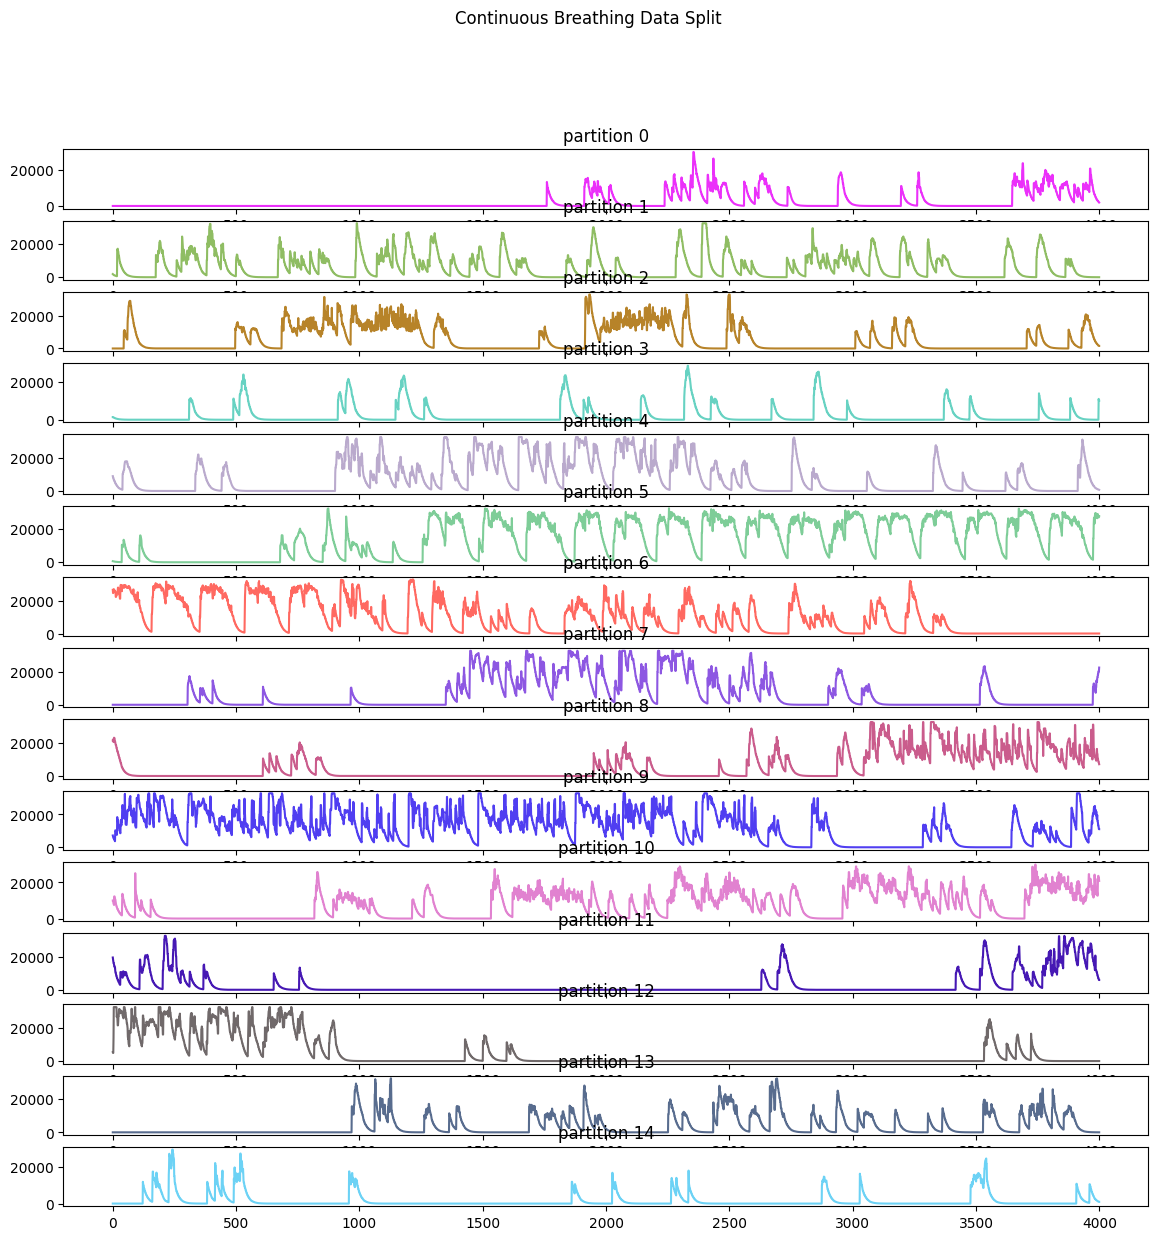

In [12]:
#split the data into equal sets of length 4000 and plot them 
numPlots = round(RMS.shape[0]/4000)

fig, axs = plt.subplots(numPlots)
fig.suptitle('Continuous Breathing Data Split')

plt.rcParams['figure.figsize'] = [18, 14]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

i = 0
while i < numPlots:
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  axs[i].plot(np.arange(0, 4000, 1),RMS[i*4000:(i+1)*4000] , c = color)
  axs[i].set_title('partition ' + str(i))
  i = i + 1

plt.show()